### Binary Traffic Sign Classification

This is our first notebook on neural networks. We will start by building a simple neural network that will help us to classify two types of traffic signs. The signs used in this lesson are a processed subset from the famous German Traffic Sign Recognition Database (GTSRB) that can be downloaded [here]().

In [1]:
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

#### Data Loading

Let's now load the data to see what we are dealing with.

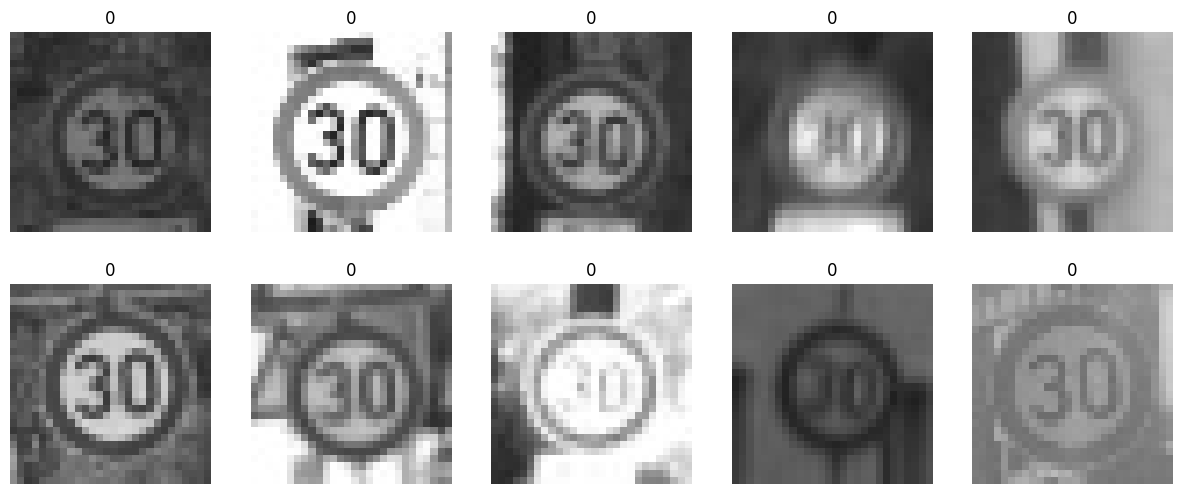

In [2]:
folder = 'data/subset_homework'

# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

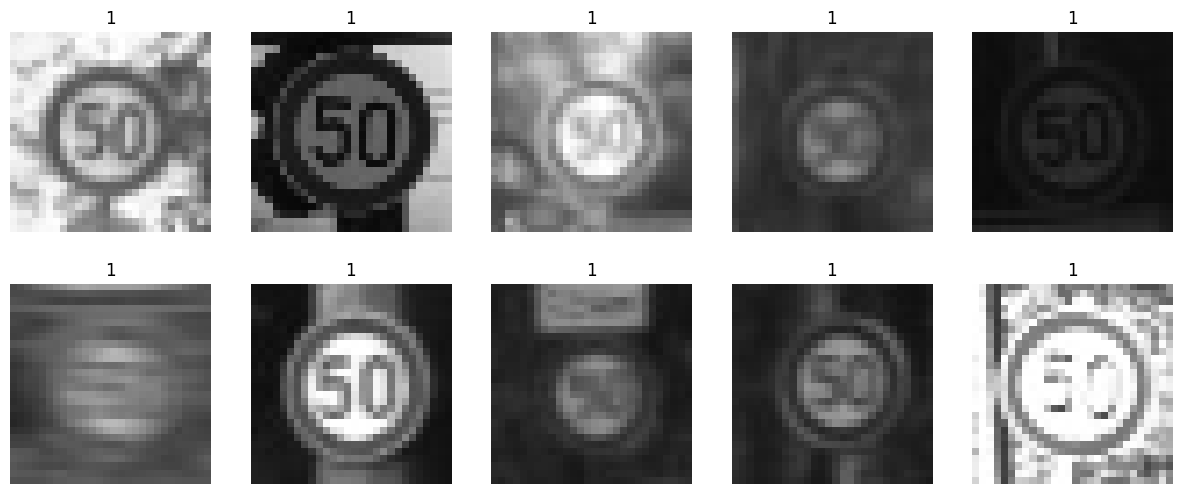

In [3]:
# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

In [4]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

Num samples class_0 2220
Num samples class_1 2250


#### Prepare Input Data

To train our neural network model, we have to prepare the data to the format the the model actually expects. In our case, this will be numpy arrays.

In [5]:
# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (4470, 28, 28)
Labels (4470,)


But now we have a problem. We cannot just feed the image to a neuron since the neuron inputs are flat (one dimensional). On the other hand, the images are 2D matrices. Therefore, we need to "flatten" the images to a one dimensional vector of pixels.

In [6]:
start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 0.031217575073242188


Before the training, let's again have a look at some raqndom samples from our dataset.

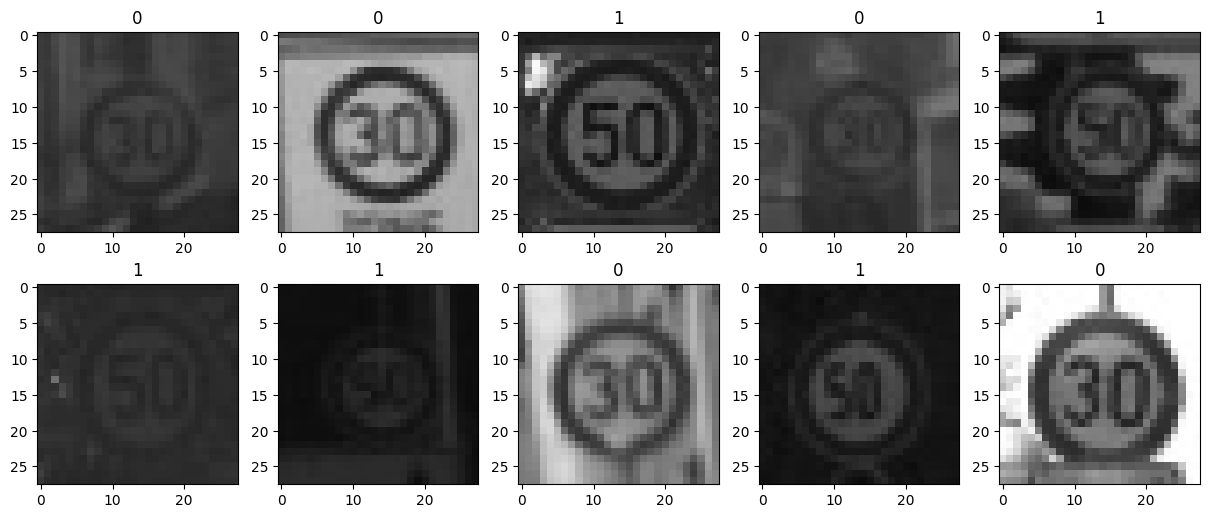

In [7]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):    
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx])

#### Building the Neural Network

Let's now build our first (and yes, very simple) neural network using Tensorflow. For that, we will need a couple of new imports.

In [8]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

2023-10-28 21:21:34.547524: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


The following netowork will consist of only one single neuron. It is a very tiny network (not even a network, strictly speaking :-) ) and yet it can be quite powerful.

In [9]:
inputs = Input(shape=(pixels.shape[1]))
outputs = Dense(1, activation="linear")(inputs)
model = Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 1)                 785       
                                                                 
Total params: 785 (3.07 KB)
Trainable params: 785 (3.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Before starting the training, we have to compile the model. During the compilation, we indicate what optimizer we want to use and what loss should be applied for the minimization process.

In [10]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

And let's train :-)

In [11]:
history = model.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10
140/140 [==============================] - 0s 2ms/step - loss: 0.2981
Epoch 2/10
140/140 [==============================] - 0s 1ms/step - loss: 0.2266
Epoch 3/10
140/140 [==============================] - 0s 1ms/step - loss: 0.1828
Epoch 4/10
140/140 [==============================] - 0s 1ms/step - loss: 0.1628
Epoch 5/10
140/140 [==============================] - 0s 1ms/step - loss: 0.1443
Epoch 6/10
140/140 [==============================] - 0s 1ms/step - loss: 0.1256
Epoch 7/10
140/140 [==============================] - 0s 1ms/step - loss: 0.1173
Epoch 8/10
140/140 [==============================] - 0s 1ms/step - loss: 0.1143
Epoch 9/10
140/140 [==============================] - 0s 1ms/step - loss: 0.1033
Epoch 10/10
140/140 [==============================] - 0s 1ms/step - loss: 0.1049


In [20]:
def plot_metric(history, metric: str, k: int = 5) -> None:
    """
    Function to plot a metric from the training history.
    
    Parameters:
    history (keras.callbacks.History): The training history.
    metric (str): The metric to plot. Can be either 'accuracy' or 'loss'.
    k (int): The interval for the x-axis ticks.
    """
    assert metric in ['accuracy', 'loss'], "Wrong type of metric. Just use 'accuracy' or 'loss'"
    
    train_metrics = history.history[metric]
#     val_metrics = history.history[f'val_{metric}']
    epochs = range(len(train_metrics))
    
    plt.plot(epochs, train_metrics, '-o', markersize=3, label=f"Training {metric}")
#     plt.plot(epochs, val_metrics, label=f"Validation {metric}")
    
#     plt.xticks([1] + [i for i in epochs if i % k == 0])
    
    plt.title(f'Training {metric}')
#     plt.title(f'Training and validation {metric}')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()

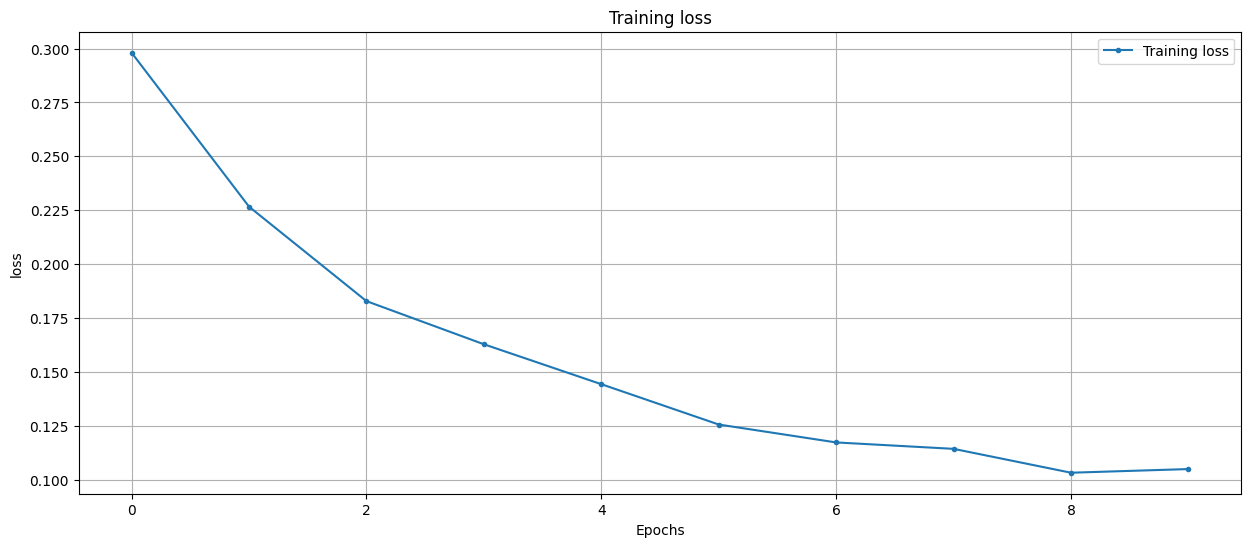

In [24]:
# Plot loss of training history
plot_metric(history, "loss")

[0.41153902] [0.41153902]


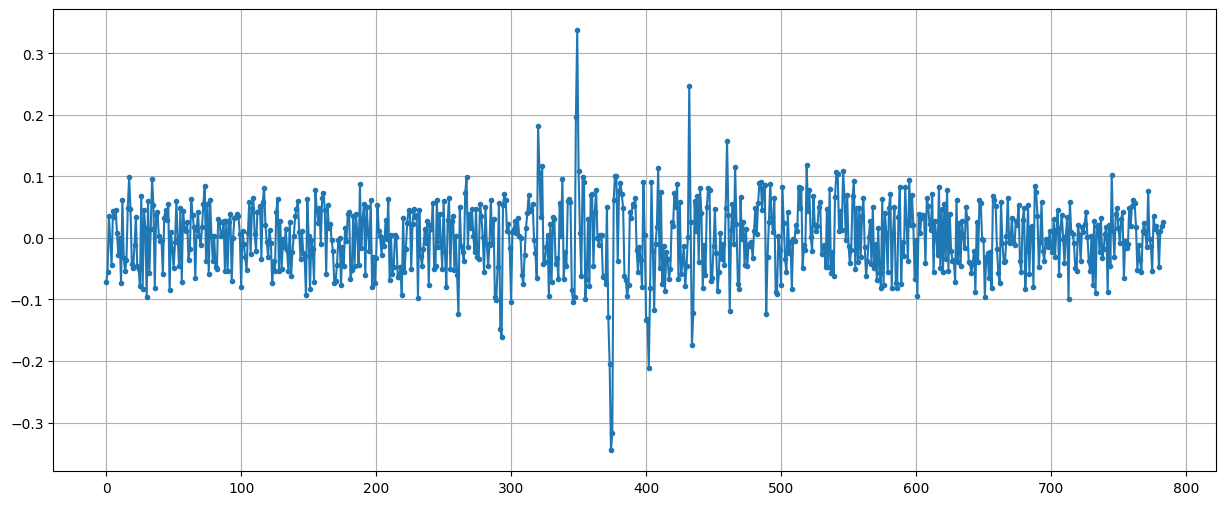

In [25]:
# Let's also have a looks at the learnt weights
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())

#### Performance Evaluation

Once our model is trained, we will can run it on our images to see how it performs (inference).

In [26]:
idx = 50
pred = model.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])

1/1 [==============================] - 0s 64ms/step
[[0.6111645]] 1


In [31]:
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = (predictions > 0.5).astype(int)

140/140 [==============================] - 0s 937us/step


In [32]:
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct += 1

print('Accuracy', correct/len(labels))

Accuracy 0.9109619686800895


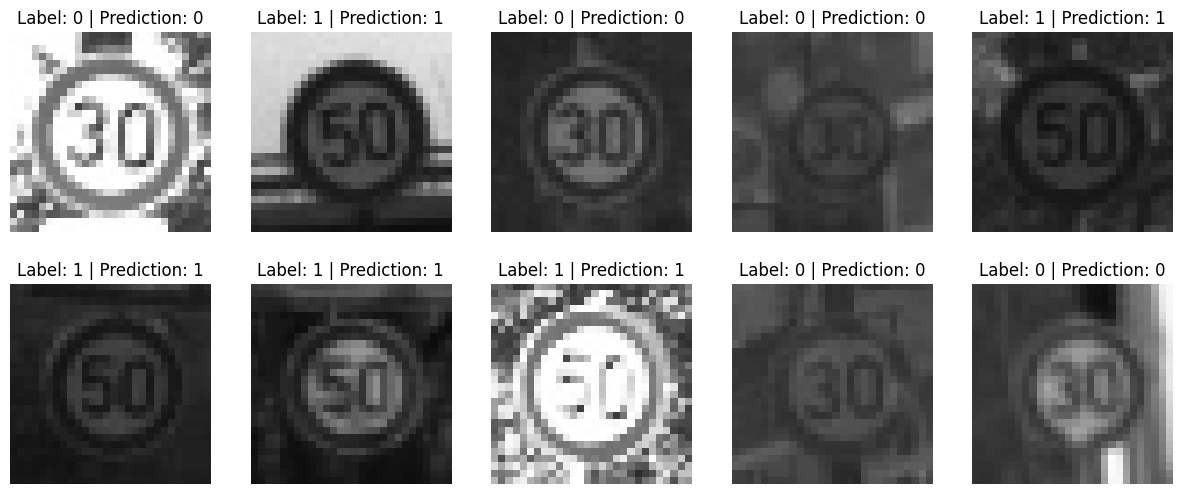

In [33]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)): 
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(f'Label: {labels[idx]} | Prediction: {predictions[idx]}')
    plt.axis(False)

Lets try to improve architecture of NN to get better score

In [34]:
from tensorflow.keras.layers import BatchNormalization

In [69]:
inputs = Input(shape=(pixels.shape[1]))
x = Dense(128, activation='relu')(inputs)
x = BatchNormalization()(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

model2 = Model(inputs, outputs)
model2.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_22 (Dense)            (None, 128)               100480    
                                                                 
 batch_normalization_7 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_23 (Dense)            (None, 64)                8256      
                                                                 
 dense_24 (Dense)            (None, 1)                 65        
                                                                 
Total params: 109313 (427.00 KB)
Trainable params: 109057 (426.00 KB)
Non-trainable params: 256 (1.00 KB)
___________________

In [70]:
model2.compile(optimizer='adam', loss='mse')

In [71]:
history2 = model2.fit(pixels, labels, epochs=15, batch_size=32)

Epoch 1/15
140/140 [==============================] - 1s 3ms/step - loss: 0.1448
Epoch 2/15
140/140 [==============================] - 0s 3ms/step - loss: 0.0783
Epoch 3/15
140/140 [==============================] - 0s 3ms/step - loss: 0.0603
Epoch 4/15
140/140 [==============================] - 0s 3ms/step - loss: 0.0600
Epoch 5/15
140/140 [==============================] - 0s 3ms/step - loss: 0.0591
Epoch 6/15
140/140 [==============================] - 0s 3ms/step - loss: 0.0529
Epoch 7/15
140/140 [==============================] - 0s 3ms/step - loss: 0.0561
Epoch 8/15
140/140 [==============================] - 0s 3ms/step - loss: 0.0486
Epoch 9/15
140/140 [==============================] - 0s 3ms/step - loss: 0.0462
Epoch 10/15
140/140 [==============================] - 0s 3ms/step - loss: 0.0439
Epoch 11/15
140/140 [==============================] - 0s 3ms/step - loss: 0.0374
Epoch 12/15
140/140 [==============================] - 0s 3ms/step - loss: 0.0416
Epoch 13/15
140/140 [====

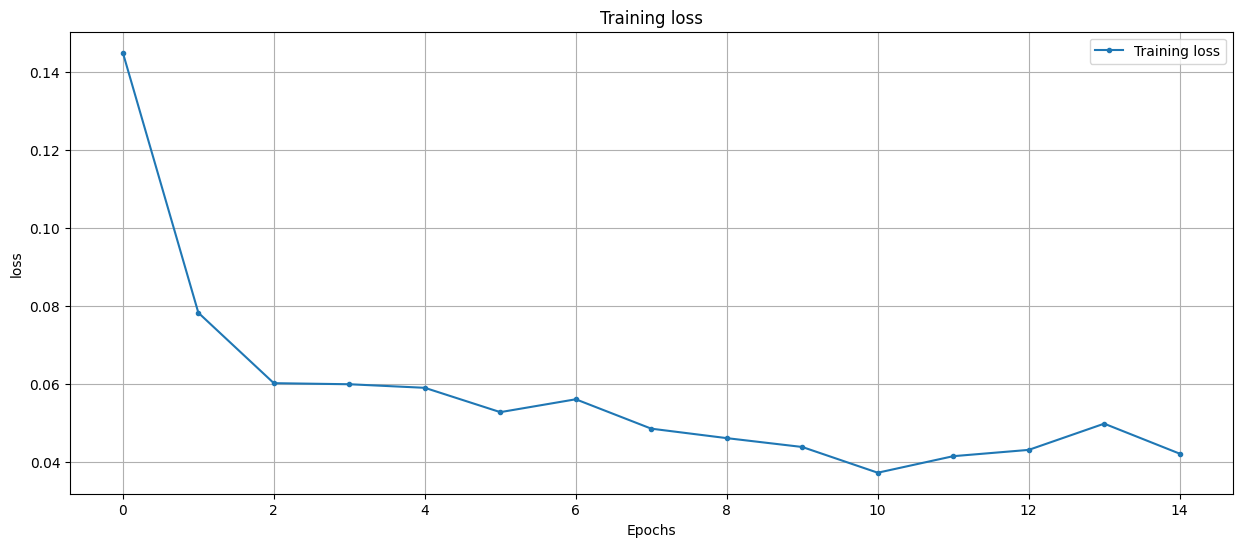

In [73]:
# Plot loss of training history
plot_metric(history2, "loss")

In [72]:
# Run it on the entire dataset
predictions = model2.predict(pixels).squeeze()
predictions = (predictions > 0.5).astype(int)

correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct += 1

print('Accuracy', correct/len(labels))

140/140 [==============================] - 0s 1ms/step
Accuracy 0.9733780760626398
